In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


In [5]:
# Load Dataset
df = pd.read_csv('cybersecurity_intrusion_data 2.csv')



In [6]:

# Data Cleaning
df.dropna(inplace=True)  # Remove missing values
df = df[df['Session_Duration'] > 0]  # Remove invalid durations

# Correct the column name here after you know it!
label_column = 'correct_column_name_here'  # <--- Replace this with your real column name!

# Label Encoding
le = LabelEncoder()
df[label_column] = le.fit_transform(df[label_column])

# Features and Target
X = df.drop([label_column], axis=1)
y = df[label_column]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)



KeyError: 'Session_Duration'

In [7]:
df.columns


Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

In [8]:
# 1. Data Cleaning
df.dropna(inplace=True)  # Remove missing values
df = df[df['session_duration'].astype(float) > 0]  # Keep only positive session durations

# 2. Feature Engineering
# Create new feature: login_success_rate
df['login_success_rate'] = (df['login_attempts'] - df['failed_logins']) / (df['login_attempts'] + 1e-5)

# Create new feature: packet_per_second
df['packet_per_second'] = df['network_packet_size'] / (df['session_duration'] + 1e-5)

# Create new feature: reputation_category
df['reputation_category'] = pd.cut(
    df['ip_reputation_score'],
    bins=[-1, 30, 70, 100],
    labels=[0, 1, 2]
).astype(int)



In [9]:
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type', 'unusual_time_access', 'reputation_category']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)


In [10]:
X = df.drop(['attack_detected', 'session_id'], axis=1)   # Features
y = df['attack_detected']                                # Target


In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [15]:
# Step 2 - Model Training and Evaluation

# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 2. K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\nKNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# 3. Support Vector Machine Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Decision Tree Results:
Accuracy: 0.8263189093064611
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       844
           1       0.82      0.84      0.83       843

    accuracy                           0.83      1687
   macro avg       0.83      0.83      0.83      1687
weighted avg       0.83      0.83      0.83      1687


KNN Results:
Accuracy: 0.8144635447540012
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       844
           1       0.87      0.74      0.80       843

    accuracy                           0.81      1687
   macro avg       0.82      0.81      0.81      1687
weighted avg       0.82      0.81      0.81      1687


SVM Results:
Accuracy: 0.8636633076467102
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       844
           1       0.94      0.78      0.85       843

    accuracy                           0.86 

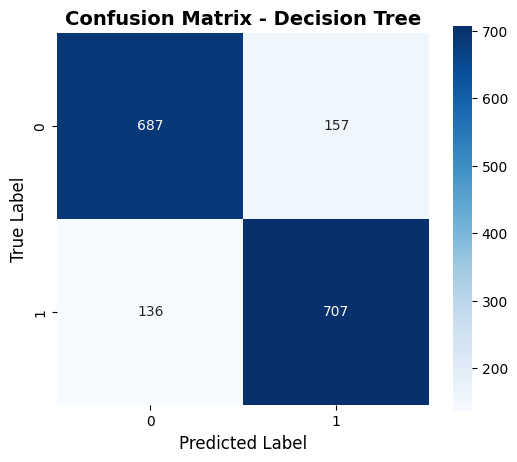

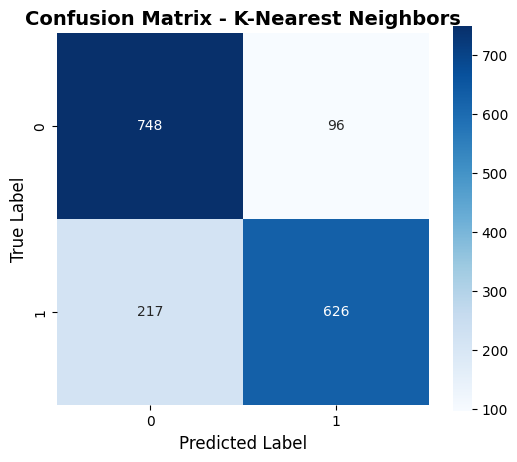

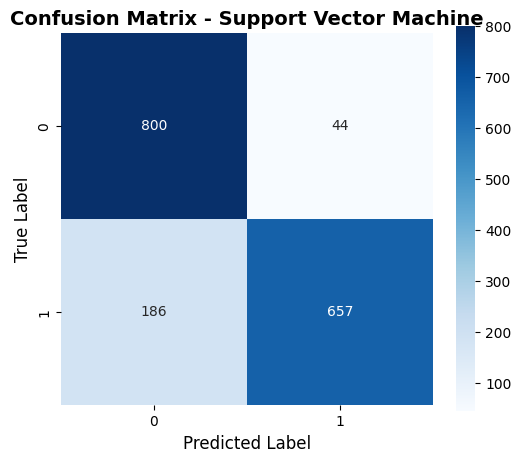

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix nicely
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
    plt.title(f"Confusion Matrix - {title}", fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(False)
    plt.show()

# Plot for Decision Tree
plot_confusion(y_test, y_pred_dt, "Decision Tree")

# Plot for K-Nearest Neighbors
plot_confusion(y_test, y_pred_knn, "K-Nearest Neighbors")

# Plot for Support Vector Machine
plot_confusion(y_test, y_pred_svm, "Support Vector Machine")



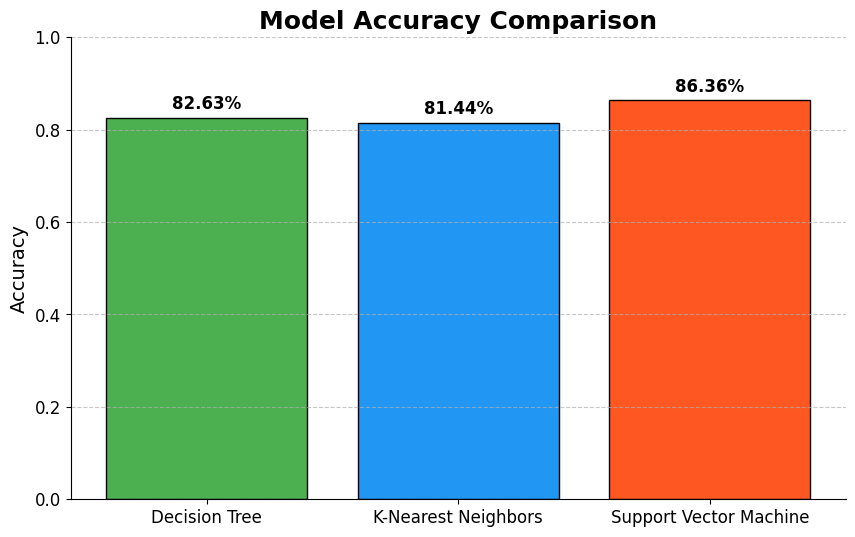

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Data
model_names = ['Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracies = [0.8263, 0.8144, 0.8636]

# Set plot size
plt.figure(figsize=(10, 6))

# Fancy colors
colors = ['#4CAF50', '#2196F3', '#FF5722']

# Create bars
bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black')

# Add accuracy labels on top
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc*100:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and Labels
plt.title('Model Accuracy Comparison', fontsize=18, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Make x-axis labels horizontal
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()


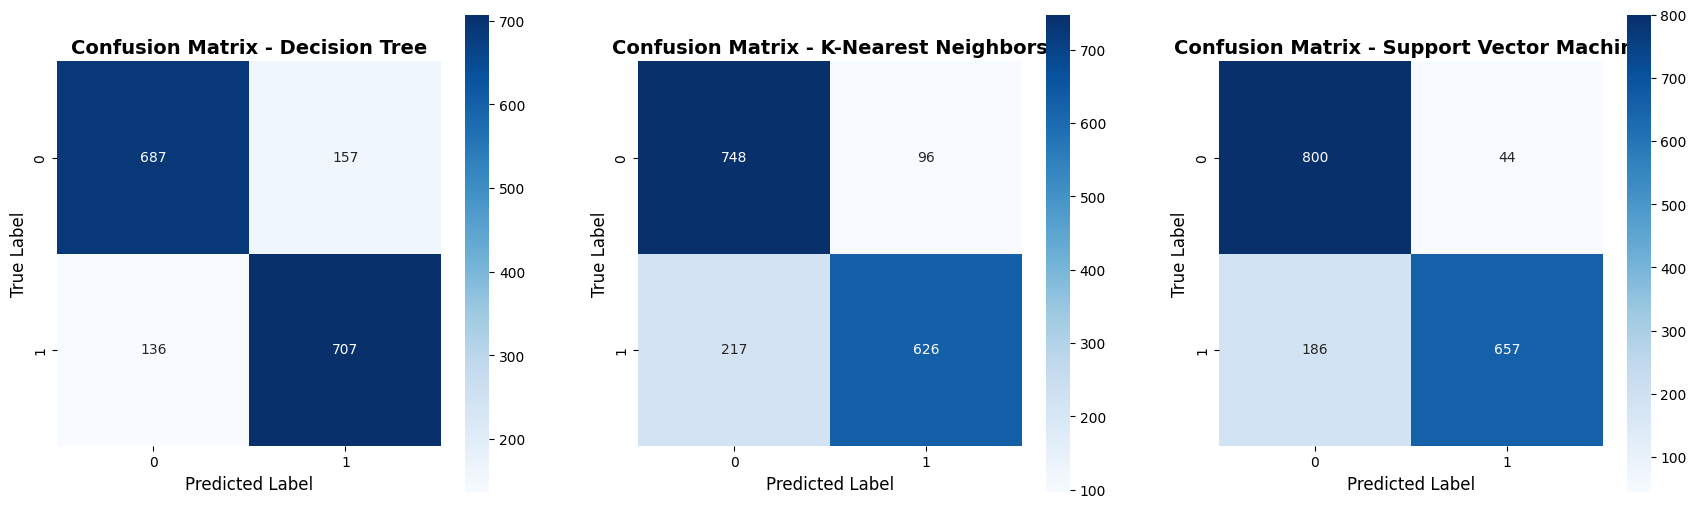

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a figure with 1 row and 3 columns: 1 for each confusion matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Define a function to plot confusion matrix in the subplot
def plot_confusion(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, ax=ax)
    ax.set_title(f"Confusion Matrix - {title}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(False)

# Plot for Decision Tree
plot_confusion(y_test, y_pred_dt, ax[0], "Decision Tree")

# Plot for K-Nearest Neighbors
plot_confusion(y_test, y_pred_knn, ax[1], "K-Nearest Neighbors")

# Plot for Support Vector Machine
plot_confusion(y_test, y_pred_svm, ax[2], "Support Vector Machine")

# Adjust layout to ensure everything fits nicely
plt.tight_layout(pad=4.0)

# Save the figure as one PNG file
plt.savefig("all_confusion_matrices.png")  # Save as PNG
plt.show()


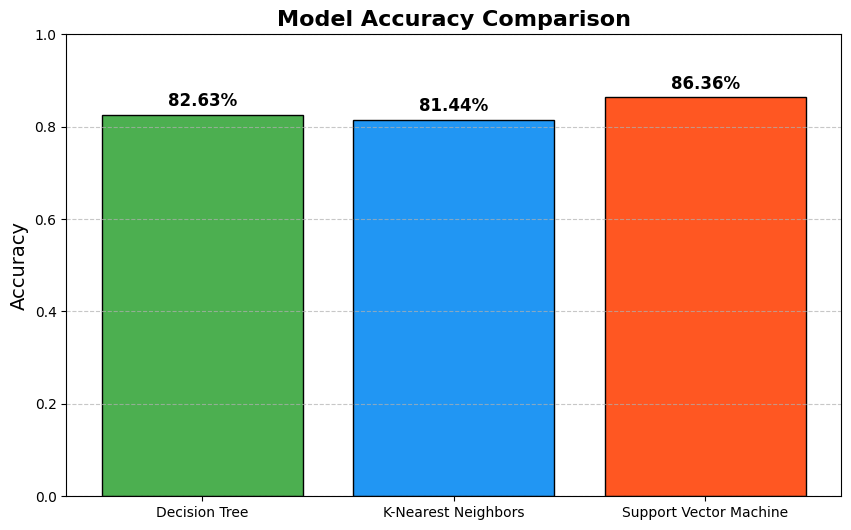

In [24]:
# Bar Chart for Model Accuracy Comparison
model_names = ['Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracies = [0.8263, 0.8144, 0.8636]  # Use your actual accuracy values

# Create Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['#4CAF50', '#2196F3', '#FF5722'], edgecolor='black')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc*100:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and Labels
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the Bar Chart as PNG
plt.savefig("model_accuracy_comparison.png")  # Save as PNG
plt.show()
